# <center> The method of least squares </center>
## <center> The most viewed videos in Youtube (2017) </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# We use Pandas to set a data frame of the most viewed videos in Youtube    

date = pd.date_range("20170704", periods=6)
set = {
    "x": [4,5,6,7,8,9],
    "Gangnam Style": [2886.5,2887.5,2888.5,2889.5,2890.6,2891.6],
    "See You Again": [2872.8,2875.9,2879,2882.2,2885.7,2889], 
    "Sorry": [2628.8,2630.9,2633,2635.1,2637.4,2639.6],
    "Uptown Funk": [2532,2534.1,2536.3,2538.5,2540.8,2543],
    "Despacito": [2310,2328,2348,2369,2393,2415]
}
song = pd.DataFrame(set, index=date)

from IPython.display import HTML, display_html, display
display(HTML('<h3>Number of Youtube views (millions)</h3>'))
display_html(song)

,x,Gangnam Style,See You Again,Sorry,Uptown Funk,Despacito
2017-07-04,4,2886.5,2872.8,2628.8,2532.0,2310
2017-07-05,5,2887.5,2875.9,2630.9,2534.1,2328
2017-07-06,6,2888.5,2879.0,2633.0,2536.3,2348
2017-07-07,7,2889.5,2882.2,2635.1,2538.5,2369
2017-07-08,8,2890.6,2885.7,2637.4,2540.8,2393
2017-07-09,9,2891.6,2889.0,2639.6,2543.0,2415


Text(0.5, 0, 'Time (days)')

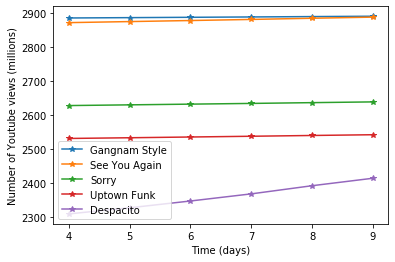

In [3]:
# We plot number of views vs time 

Fig1 = song.plot(x = 'x',marker='*')
Fig1.set_ylabel("Number of Youtube views (millions)")
Fig1.set_xlabel("Time (days)")

### The following equations are derived in the article:
(read article: https://nepy.pe/article.php?pid=6240c453eae64&lan=en)

The linear equation with one variable is: $y = m x + b$, with
$$ m = \frac{n\sum_i^n y_i x_i - \sum_i^n y_i \sum_i^n x_i}{n\sum_i^n x_i^2 - (\sum_i^n x_i)^2},$$
$$ b = \frac{\sum_i^n y_i \sum_i^n x_i^2 - \sum_i^n y_i x_i \sum_i^n x_i}{n\sum_i^n x_i^2 - (\sum_i^n x_i)^2}.$$

Considering the following relations:

$$ S_x = \sum_i^n x_i, $$
$$ S_{xx} = \sum_i^n x_i^2, $$
$$ S_y = \sum_i^n y_i, $$
$$ S_{yx} = \sum_i^n y_i x_i. $$

The expressions are reduced to:

$$ m = \frac{n S_{yx} - S_y S_x}{n S_{xx} - (S_x)^2},$$
$$ b = \frac{S_y S_{xx} - S_{yx} S_x}{n S_{xx} - (S_x)^2}.$$

Then we have,

In [4]:
# We set m and b in vector form

cancion = song.to_numpy()
Sx  = np.sum(cancion[:,0])
Sxx = np.sum(np.power(cancion[:,0] ,2))
Sy  = np.sum(cancion[:,1:6] ,axis=0)
Syx = np.sum(cancion[:,1:6] * cancion[:,0].reshape((len(cancion),1)) ,axis=0)
n   = len(cancion[:,0])

m = (n*Syx - Sy*Sx)/(n*Sxx - Sx*Sx)
b = (Sy * Sxx - Syx * Sx)/(n*Sxx - Sx*Sx)

In [5]:
# We set the linear equations in vector form

points = 51
y= np.zeros((points,len(cancion)-1))
x= np.zeros((points,1))
for i in range(0,points):
    x[i] = i           # x.shape = (51,1)
    y[i,:] = m*i + b   # y.shape = (51,5)

# y[:,0] => Gangnam Style, y[:,1] => See You Again, y[:,2] => Sorry, y[:,3] => Uptown Funk, y[:,4] => Despacito.      

Text(0.5, 0, 'Time (days)')

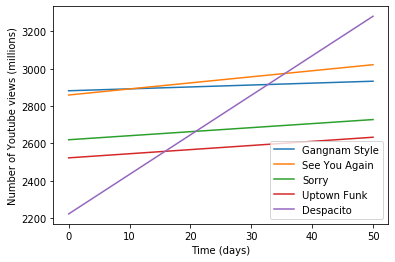

In [6]:
# We plot the linear equations

fig, ax = plt.subplots()
ax.plot(x, y)
ax.legend(['Gangnam Style','See You Again','Sorry','Uptown Funk','Despacito'])
ax.set_ylabel("Number of Youtube views (millions)")
ax.set_xlabel("Time (days)")


# When does See You Again surpass Gangnam Style?

The linear equations of Gangnam Style ($g$) and See You Again ($s$) are:

$$y_{g} = m_{g} x + b_{g},$$
$$y_{s} = m_{s} x + b_{s}.$$

See You Again surpasses Gangnam Style just when the lines intersect, i.e.,

$$x = \frac{b_{g} - b_{s}}{m_{s} - m_{g}}.$$

In [7]:
(b[0]-b[1])/(m[1]-m[0])

10.218937446442368

**- On July 10th, See You Again surpasses Gangnam Style.**

# When does Despacito surpass the other songs?
A similar approach as before is taken:


In [8]:
# j=0 => Gangnam Style, j=1 => See You Again, j=2 => Sorry y j=3 => Uptown Funk.
dates=[]
for j in range(0,4): 
    dates.append((b[j]-b[4])/(m[4]-m[j]))
print(dates)

[32.731801852901, 35.523483158003984, 20.893096884078428, 15.831399728793286]


**- On July 15th it surpasses Uptown Funk.**

**- On July 20th 20 it surpasses Sorry.**

**- On July 32nd ( August 1st) it surpasses Gangnam Style.**

**- On July 35th ( August 4th ) it surpasses See You Again.**

# When does Despacito reach 3 billion views in Youtube?
The linear equation of Despacito ($d$) is:

$$y_{d} = m_{d} x + b_{d}.$$

To know when it reaches 3 billion views we set:

$$\frac{3000- b_{d}}{m_{d}} = x.$$

In [9]:
(3000 - b[4]) / m[4]

36.705802968960874

**- On July 36th (August 5th) Despacito reaches 3 billion views in Youtube.**